# IMPORTING LIBRARIES

In [173]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Imputer
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

# READING DATASET

In [174]:
df=pd.read_csv("housing.csv")

In [175]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [177]:
df.shape

(20640, 10)

In [178]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [179]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [180]:
corr = df.corr()

In [181]:
corr_df = corr['median_house_value'].sort_values(ascending = False)
corr_df

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

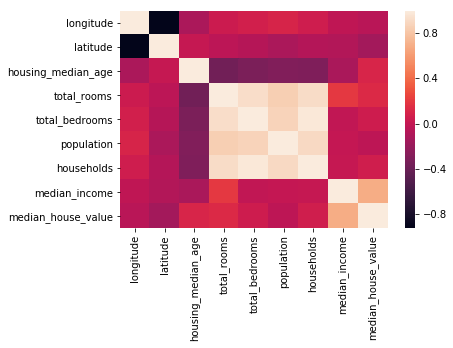

In [182]:
sns.heatmap(corr)
plt.show()

In [183]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [184]:
dummy = pd.get_dummies(df['ocean_proximity'])

In [185]:
dummy.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [186]:
dummy.drop('ISLAND',axis= 1,inplace=True)

In [187]:
dummy.head()

,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [188]:
df['<1H OCEAN'] = dummy['<1H OCEAN'].values
df['INLAND'] = dummy['INLAND'].values
df['NEAR BAY'] = dummy['NEAR BAY'].values
df['NEAR OCEAN'] = dummy['NEAR OCEAN'].values

In [189]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,1,0


# Fill null values

In [190]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
<1H OCEAN               0
INLAND                  0
NEAR BAY                0
NEAR OCEAN              0
dtype: int64

In [191]:
train_ft = df.drop(['ocean_proximity','median_house_value'],axis=1)

In [192]:
imputer = Imputer(strategy='median')
imputer.fit(train_ft)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [193]:
imputer.statistics_

array([-118.49  ,   34.26  ,   29.    , 2127.    ,  435.    , 1166.    ,
        409.    ,    3.5348,    0.    ,    0.    ,    0.    ,    0.    ])

In [194]:
train_ft.median().values

array([-118.49  ,   34.26  ,   29.    , 2127.    ,  435.    , 1166.    ,
        409.    ,    3.5348,    0.    ,    0.    ,    0.    ,    0.    ])

In [195]:
x = imputer.transform(train_ft)

In [196]:
train_new_set = pd.DataFrame(x,columns=train_ft.columns)
train_new_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0.0,0.0,1.0,0.0


In [197]:
train_new_set.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
<1H OCEAN             0
INLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

In [198]:
train_new_set.shape 

(20640, 12)

In [199]:
train_new_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
<1H OCEAN             20640 non-null float64
INLAND                20640 non-null float64
NEAR BAY              20640 non-null float64
NEAR OCEAN            20640 non-null float64
dtypes: float64(12)
memory usage: 1.9 MB


In [200]:
df.shape

(20640, 14)

In [201]:
train_new_set.shape

(20640, 12)

In [202]:
X = train_new_set.values
Y = df['median_house_value']

# Split the data

In [203]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2000)

In [204]:
x_train.shape

(16512, 12)

In [205]:
y_test.shape

(4128,)

In [206]:
x_test.shape

(4128, 12)

# Model - Linear Regression

In [207]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [208]:
predictions = lr.predict(x_test[:10])
predictions

array([227629.7167659 , 276511.05326894,  95864.66527413, 303957.10544915,
       216815.14655613, 233337.30150717, 146390.2763806 , 125785.84358537,
       325036.40012205, 276443.22881307])

In [209]:
y_train[:10]

19916     92600.0
16256     50500.0
17393    129200.0
18834     55700.0
9980     152800.0
9131     151300.0
4399     228800.0
19162    165400.0
7267     175000.0
15214    263600.0
Name: median_house_value, dtype: float64

In [210]:
data = {'Predicted':predictions,'Actual':y_test[:10].values,'Diff':(predictions-y_train[:10].values)}
error_df = pd.DataFrame(data=data)
error_df

,Predicted,Actual,Diff
0,227629.716766,372200.0,135029.716766
1,276511.053269,309100.0,226011.053269
2,95864.665274,137500.0,-33335.334726
3,303957.105449,500001.0,248257.105449
4,216815.146556,179800.0,64015.146556
5,233337.301507,266700.0,82037.301507
6,146390.276381,99300.0,-82409.723619
7,125785.843585,81400.0,-39614.156415
8,325036.400122,372000.0,150036.400122
9,276443.228813,291500.0,12843.228813


# Model Evaluation

In [211]:
pred = lr.predict(x_test)

In [212]:
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)

In [213]:
mse

4635223116.198846

In [214]:
rmse

68082.47290014403

In [215]:
mae = mean_absolute_error(y_test,pred)

In [216]:
mae

49700.35774515332

In [217]:
r2 = r2_score(y_test,pred)

In [218]:
r2

0.647236462350092

# Train

In [219]:
scores = cross_val_score(lr,x_train,y_train,scoring='neg_mean_squared_error',cv=7)
rmse_score = np.sqrt(-scores)

In [220]:
rmse_score

array([68108.56887065, 68352.87530419, 70978.61773041, 68079.70782694,
       67941.33455052, 71056.13295943, 68990.20230002])

In [221]:
rmse_score.mean()

69072.49136316679